In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sympy.physics.units as u
import sympy as sp
import numpy as np
import logging as log
import functools
import matplotlib.pyplot as plt
import seaborn
import pandas as pd
pd.set_option('display.max_columns', None)
%matplotlib inline
from IPython.display import display, HTML

import sys, os, importlib
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import miptlabs as ml
importlib.reload(ml)

importlib.reload(log)
log.basicConfig(level=log.INFO, format='LOG %(message)s', stream=sys.stdout)

sp.Basic.__str__=lambda expr, **settings:ml.PQStrPrinter(settings).doprint(expr)

sp.__version__

'1.1.2.dev'

In [3]:
data = pd.read_csv('4.2.csv')
#display(data)

In [20]:
# Камера
I0 = ml.PQ(2*10**-12*u.A, sigma=1*10**-12*u.A)
# пикоамперы
# атм давл
P0 = ml.PQ(99*1000*u.pa, sigma=1*u.torr)
T0 = ml.PQ(ml.celsium_to_kelvins(23), sigma=1*u.kelvin)
Pn = ml.PQ(760*u.torr, is_const=True)
Tn = ml.PQ(ml.celsium_to_kelvins(15), is_const=True)


In [37]:
df1 = pd.DataFrame()
df1['P_{raw}'] = ml.get_column(data, 'P_raw', lambda row: ml.PQ(row['P_raw']*u.torr, sigma=1.0*u.torr))
df1['P'] = P0-df1['P_{raw}']
df1['N'] = ml.get_column(data, 'N', lambda row: ml.PQ(row['N']/u.s, sigma=10/u.s))
df1['I'] = ml.get_column(data, 'I', lambda row: ml.PQ(row['I']*10**-12*u.A, sigma=1*10**-12*u.A))-I0
print(ml.get_mean(df1['N'][18:]))
display(df1)

11±10 1/s (87%)


,P_{raw},P,N,I
0,730.0±1.0 mmHg (0.14%),12.6±1.4 mmHg (11%),3303±10 1/s (0.30%),(26.00±1.40)*10^-12 A (5.4%)
1,710.0±1.0 mmHg (0.14%),32.6±1.4 mmHg (4.3%),2998±10 1/s (0.33%),(61.00±1.40)*10^-12 A (2.3%)
2,690.0±1.0 mmHg (0.14%),52.6±1.4 mmHg (2.7%),2698±10 1/s (0.37%),(90.00±1.40)*10^-12 A (1.6%)
3,670.0±1.0 mmHg (0.15%),72.6±1.4 mmHg (1.9%),2440±10 1/s (0.41%),(122.00±1.40)*10^-12 A (1.2%)
4,650.0±1.0 mmHg (0.15%),92.6±1.4 mmHg (1.5%),2116±10 1/s (0.47%),(155.00±1.40)*10^-12 A (0.91%)
5,630.0±1.0 mmHg (0.16%),112.6±1.4 mmHg (1.3%),1808±10 1/s (0.55%),(187.00±1.40)*10^-12 A (0.76%)
6,610.0±1.0 mmHg (0.16%),132.6±1.4 mmHg (1.1%),1467±10 1/s (0.68%),(221.00±1.40)*10^-12 A (0.64%)
7,590.0±1.0 mmHg (0.17%),152.6±1.4 mmHg (0.93%),1032±10 1/s (0.97%),(256.00±1.40)*10^-12 A (0.55%)
8,570.0±1.0 mmHg (0.18%),172.6±1.4 mmHg (0.82%),780±10 1/s (1.3%),(291.00±1.40)*10^-12 A (0.49%)
9,550.0±1.0 mmHg (0.18%),192.6±1.4 mmHg (0.73%),558±10 1/s (1.8%),(329.00±1.40)*10^-12 A (0.43%)


In [38]:
table_to_print1 = ml.prepare_to_print(df1)

ml.write_latex('table.tex', [table_to_print1], horizontal=False)


/home/sharik/.pyenv/versions/3.6.0/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


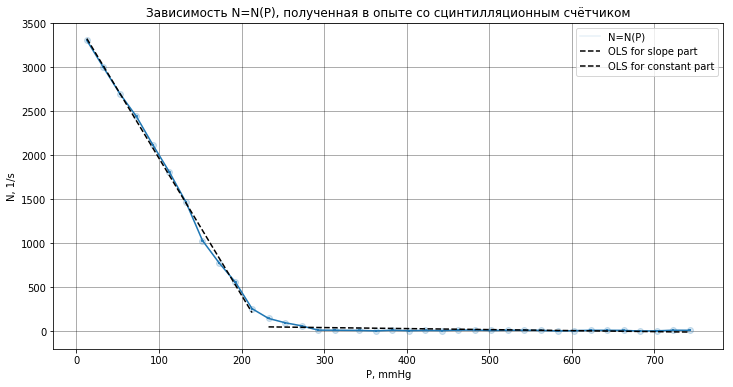

(array([ -15.545     , 3518.76012456]), [0.22933113306971095, 917.3245322788442])
(array([-0.11480861, 78.52176264]), [0.03405679744612576, 794.3143445774294])
(226.35960917050633, 3518.76012455552)
(683.9361651829664, 78.52176264121029)


In [65]:
plt.figure(figsize=(12, 6))
ml.plt_pq(df1['P'], df1['N'], label='N=N(P)')
ols1 = ml.plot_OLS(df1['P'][:11], df1['N'][:11], label='slope part')
ols2 = ml.plot_OLS(df1['P'][11:], df1['N'][11:], label='constant part')
plt.xlabel('P, mmHg')
plt.ylabel('N, 1/s')
plt.legend()
plt.title('Зависимость N=N(P), полученная в опыте со сцинтилляционным счётчиком')
plt.show()
print(ols1)
print(ols2)
print(ml.get_intersections_with_axes(ols1[0][0], ols1[0][1]))
print(ml.get_intersections_with_axes(ols2[0][0], ols2[0][1]))

In [66]:
P_extrap, I_extrap = ml.get_intersection_of_lines(*ols1[0], *ols2[0])
P_extrap *= u.torr
I_extrap *= 10**-12*u.A
print(P_extrap, I_extrap)
normalization_multiplier = Tn/T0*P0/Pn
R_extrap = 9*u.cm
R0 = R_extrap*P_extrap/P0
print('R0', R0.repr_as(u.mm))
Rn = R0*normalization_multiplier #*Tn/Pn*P0/T0
print('Rn', Rn.repr_as(u.mm))
E = (Rn/(0.32*u.mm)**2/3)*u.electronvolt
print('E', E.repr_as(u.electronvolt))

222.955002674631*mmHg 5.29246079783857e-11*A
R0 27.02±0.04 mm (0.13%)
Rn 25.69±0.10 mm (0.39%)
E 25.84±0.10 eV (0.39%)


/home/sharik/.pyenv/versions/3.6.0/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


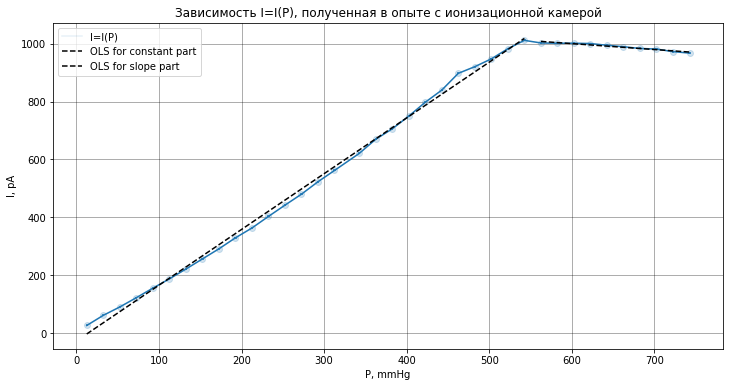

(array([  1.92828699, -27.57988588]), [0.0182225290493289, 466.3967572208488])
(array([-2.04242424e-01,  1.12328063e+03]), [0.01735599281758474, 57.27477629803267])
(14.302791029075205, -27.579885881819415)
(5499.741968989256, 1123.280632454174)


In [67]:
plt.figure(figsize=(12, 6))
ml.plt_pq(df1['P'], df1['I']*10**12, label='I=I(P)')
ols1 = ml.plot_OLS(df1['P'][:37-10], df1['I'][:37-10]*10**12, label='constant part')
ols2 = ml.plot_OLS(df1['P'][37-10:], df1['I'][37-10:]*10**12, label='slope part')
plt.xlabel('P, mmHg')
plt.ylabel('I, pA')
plt.legend()
plt.title('Зависимость I=I(P), полученная в опыте с ионизационной камерой')
plt.show()
print(ols1)
print(ols2)
print(ml.get_intersections_with_axes(ols1[0][0], ols1[0][1]))
print(ml.get_intersections_with_axes(ols2[0][0], ols2[0][1]))

In [72]:
P_extrap, I_extrap = ml.get_intersection_of_lines(*ols1[0], *ols2[0])
P_extrap *= u.torr
I_extrap *= 10**-12*u.A
print(P_extrap, I_extrap)
normalization_multiplier = Tn/T0*P0/Pn
R_extrap = (50-2.5)*u.mm
R0 = R_extrap*P_extrap/P0
print('R0', R0.repr_as(u.mm))
Rn = R0*normalization_multiplier #*Tn/Pn*P0/T0
print('Rn', Rn.repr_as(u.mm))
E = (Rn/(0.32*u.mm)**2/3)*u.electronvolt
print('E', E.repr_as(u.electronvolt))

539.669234995788*mmHg 1.01305727960958e-9*A
R0 34.52±0.05 mm (0.13%)
Rn 32.82±0.13 mm (0.39%)
E 33.01±0.13 eV (0.39%)
